In [1]:
## 1. 필요한 라이브러리 임포트

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
## 2. MNIST 데이터셋 로드

# MNIST 데이터셋 다운로드
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# 데이터 전처리
X = X.astype('float32') / 255.0
y = y.astype('int')

print("데이터 형태:", X.shape)
print("레이블 형태:", y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


데이터 형태: (70000, 784)
레이블 형태: (70000,)


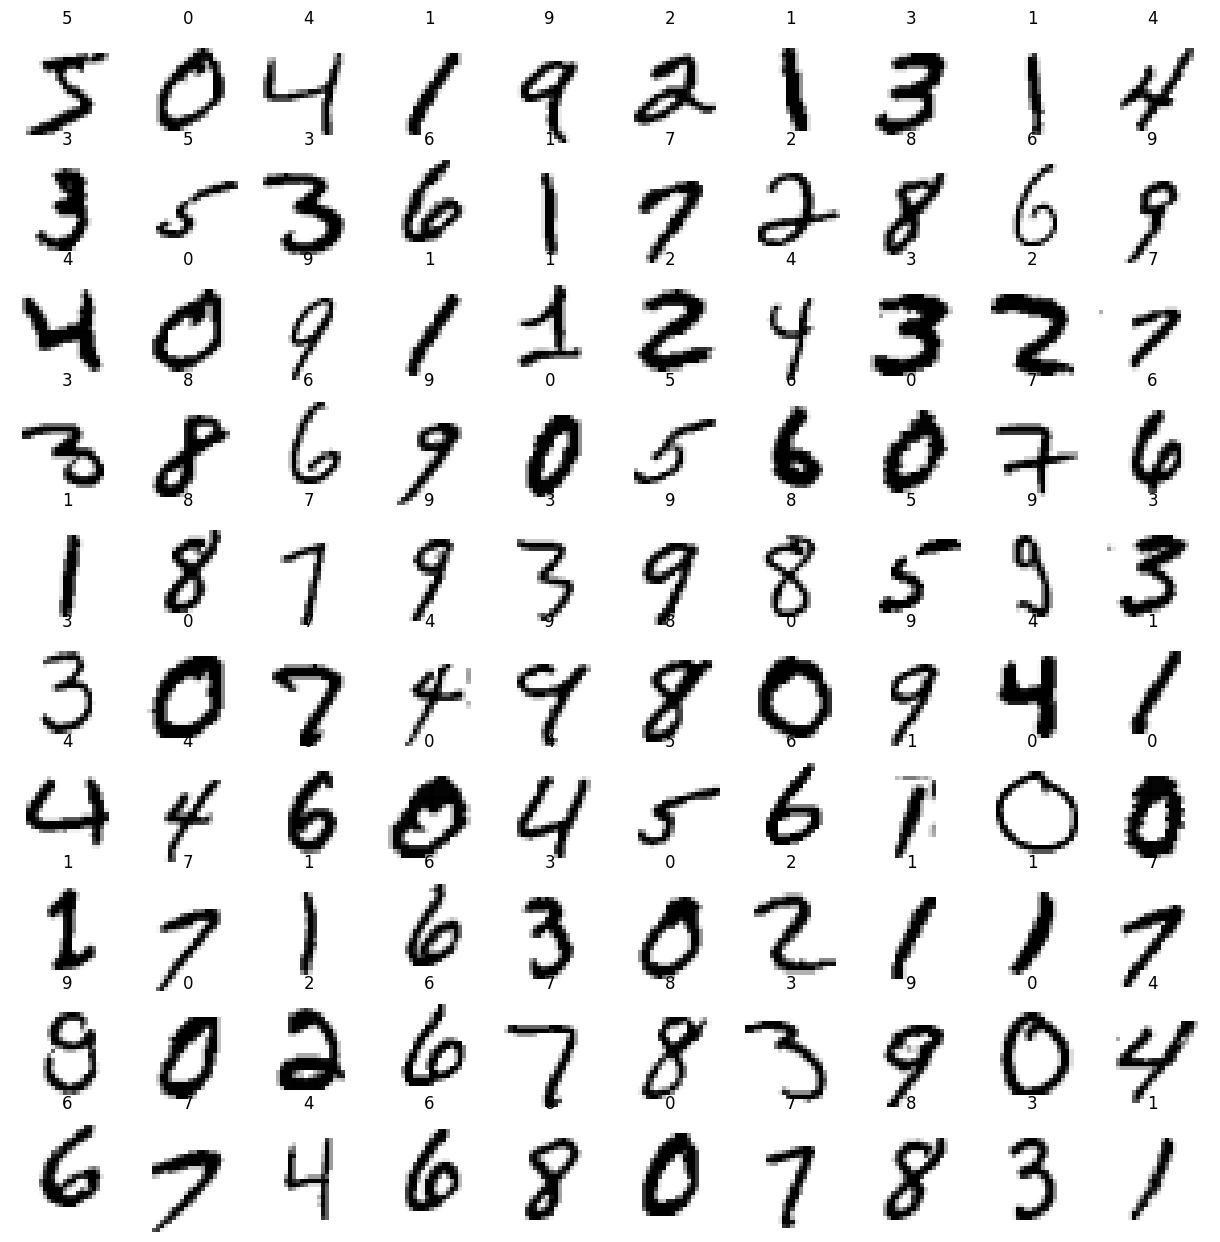

In [3]:
## 3. 원본 이미지 시각화

def plot_digits(images, targets, nx=10, ny=10, random_state=42):
    plt.figure(figsize=(12, 12))
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.05, hspace=0.05)
    rng = np.random.RandomState(random_state)
    for i in range(nx * ny):
        plt.subplot(ny, nx, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='binary')
        plt.title(str(targets[i]))
        plt.axis('off')
    plt.show()

plot_digits(X, y)

In [4]:
## 4. PCA 적용

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

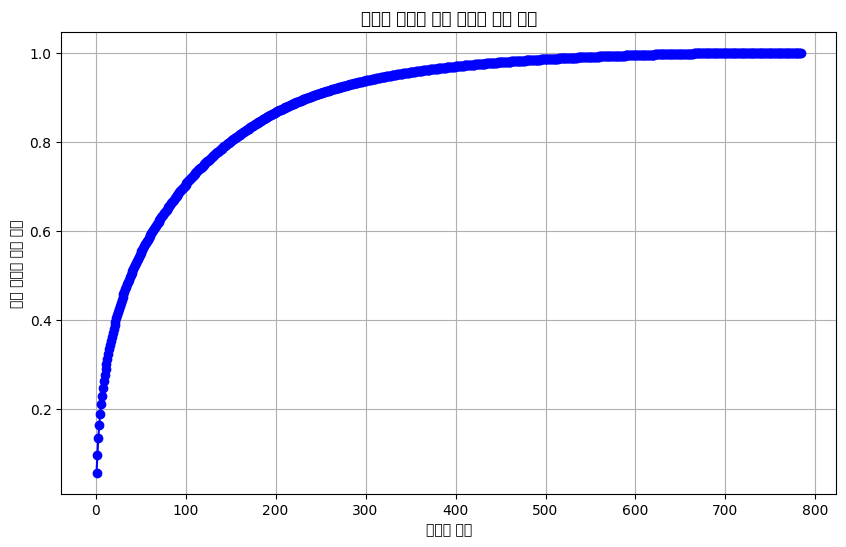

처음 100개의 주성분으로 설명되는 분산 비율: 0.7038


In [5]:
## 5. 설명된 분산 비율 시각화

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명된 분산 비율')
plt.title('주성분 개수에 따른 설명된 분산 비율')
plt.grid(True)
plt.show()

print(f"처음 100개의 주성분으로 설명되는 분산 비율: {cumulative_variance_ratio[99]:.4f}")


<ipython-input-6-730f7b3a194d>:22: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
<ipython-input-6-730f7b3a194d>:22: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout()
<ipython-input-6-730f7b3a194d>:22: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  plt.tight_layout()
<ipython-input-6-730f7b3a194d>:22: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-6-730f7b3a194d>:22: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from

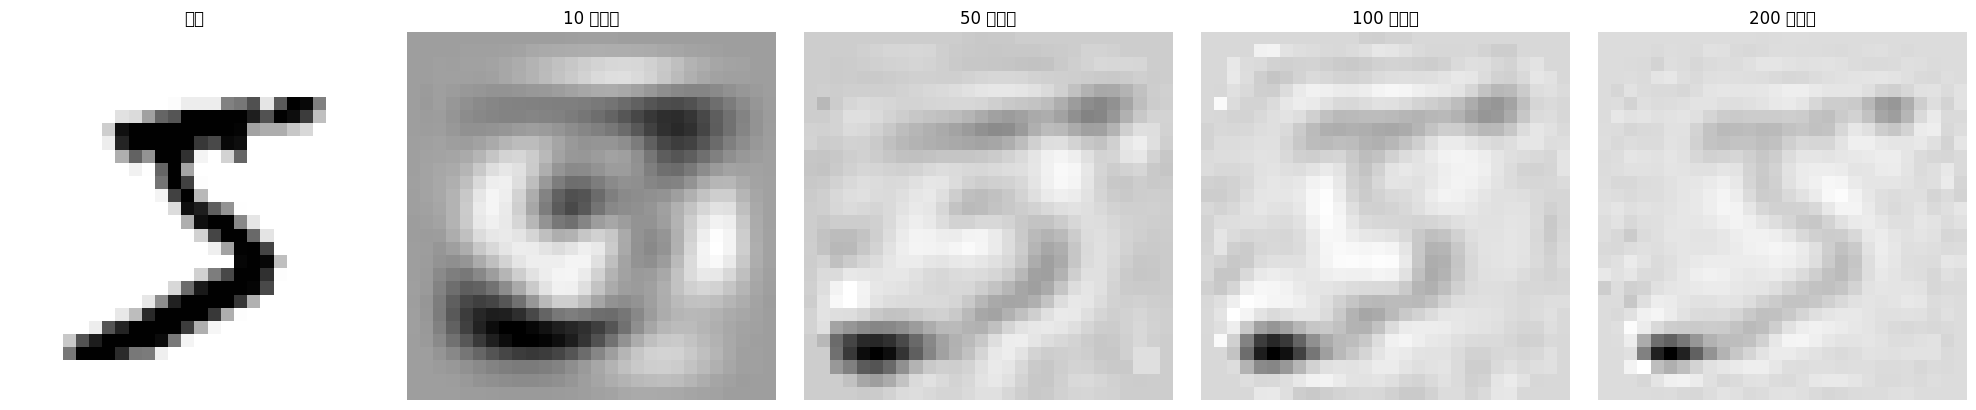

In [6]:
## 6. 이미지 재구성

def reconstruct_images(pca, X, n_components):
    pca.n_components = n_components
    X_reduced = pca.fit_transform(X)
    X_recovered = pca.inverse_transform(X_reduced)
    return X_recovered

n_components_list = [10, 50, 100, 200]
fig, axes = plt.subplots(1, len(n_components_list) + 1, figsize=(20, 4))

axes[0].imshow(X[0].reshape(28, 28), cmap='binary')
axes[0].set_title("원본")
axes[0].axis('off')

for i, n_comp in enumerate(n_components_list, 1):
    X_recovered = reconstruct_images(PCA(), X_scaled, n_comp)
    axes[i].imshow(X_recovered[0].reshape(28, 28), cmap='binary')
    axes[i].set_title(f"{n_comp} 주성분")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

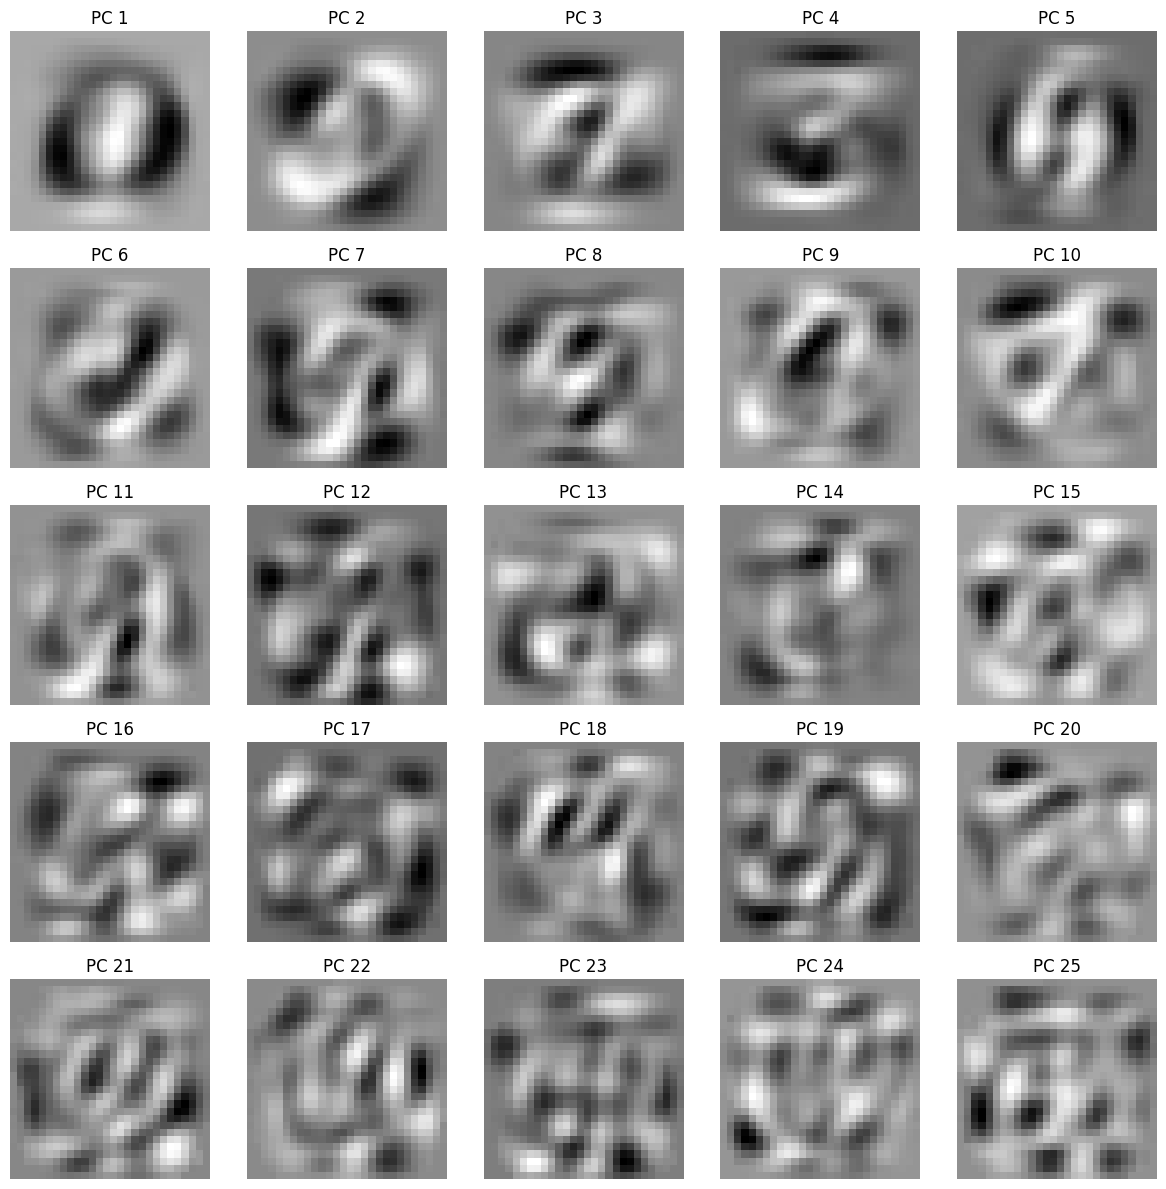

In [7]:
## 7. 주성분 시각화

n_components = 25
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

fig, axes = plt.subplots(5, 5, figsize=(12, 12))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='binary')
    ax.axis('off')
    ax.set_title(f"PC {i+1}")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

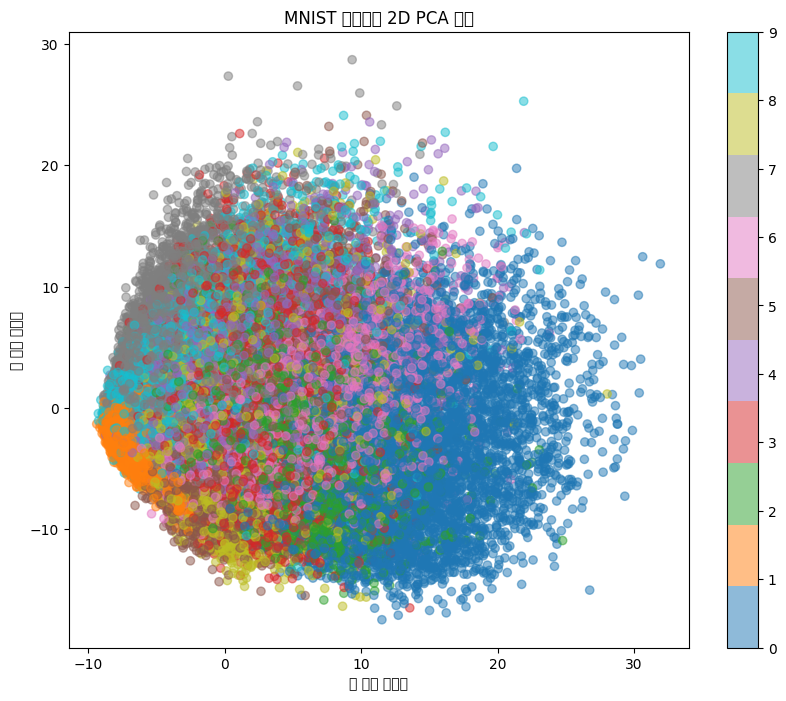

In [8]:
## 8. 2D로 축소된 데이터 시각화

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', alpha=0.5)
plt.colorbar(scatter)
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.title('MNIST 데이터의 2D PCA 투영')
plt.show()

In [9]:
## 9. 결론

print("PCA를 통해 우리는 다음과 같은 인사이트를 얻을 수 있습니다:")
print("1. MNIST 데이터셋의 대부분의 분산을 설명하는 데 필요한 주성분의 수")
print("2. 이미지 재구성에 필요한 최소한의 정보량")
print("3. 각 주성분이 포착하는 이미지의 주요 특징")
print("4. 고차원 데이터의 2D 시각화를 통한 클래스 분포 이해")
print("\nPCA는 차원 축소, 특징 추출, 데이터 압축 등 다양한 용도로 활용될 수 있습니다.")

PCA를 통해 우리는 다음과 같은 인사이트를 얻을 수 있습니다:
1. MNIST 데이터셋의 대부분의 분산을 설명하는 데 필요한 주성분의 수
2. 이미지 재구성에 필요한 최소한의 정보량
3. 각 주성분이 포착하는 이미지의 주요 특징
4. 고차원 데이터의 2D 시각화를 통한 클래스 분포 이해

PCA는 차원 축소, 특징 추출, 데이터 압축 등 다양한 용도로 활용될 수 있습니다.
